In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as graph

import eli5

from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

graph.style.use('fivethirtyeight')

In [2]:
x, y = make_hastie_10_2(n_samples=10000)

x_train, x_test, y_train, y_test = train_test_split(x, y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7500, 10) (2500, 10) (7500,) (2500,)


In [3]:
df = pd.DataFrame(x_train)
df.columns = [f'x{i}' for i in range(x_train.shape[1])]
df['y'] = y_train

display(df.sample(5))

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,y
7216,0.599616,0.177929,-1.787806,2.017767,-0.080522,-1.176538,0.238792,0.353678,-1.526474,-0.314184,1.0
5308,-1.590717,0.135767,0.097671,0.570156,-1.594446,-2.246974,-0.287884,0.210566,-0.908505,-0.121403,1.0
6827,-1.497016,1.311847,0.998842,0.534922,-0.577665,-0.005330,1.159278,1.040927,1.465129,-1.873518,1.0
4688,-1.342091,2.288999,0.233592,0.347252,-0.493147,-1.984495,0.631978,0.732426,1.304713,-0.749646,1.0
6354,-2.068870,0.283335,-0.074799,0.494181,0.091763,-0.933101,-0.763469,0.890543,-1.256759,0.261721,-1.0


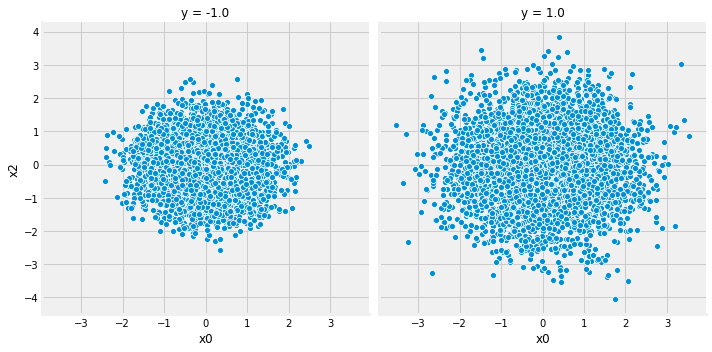

In [4]:
sns.relplot(x='x0', y='x2', data=df, col='y')
graph.show()

### Random Forest Classifier

In [5]:
rf_model = RandomForestClassifier(max_depth=7, max_features=2, n_estimators=1000, n_jobs=-1, oob_score=True)
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

0.8369333333333333
0.7910666666666667


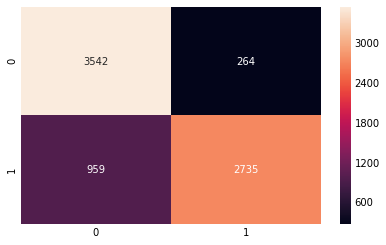

In [6]:
# Training score
print(rf_model.score(x_train, y_train))
print(rf_model.oob_score_)

y_train_pred = rf_model.predict(x_train)
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='g')
graph.show()

0.7708


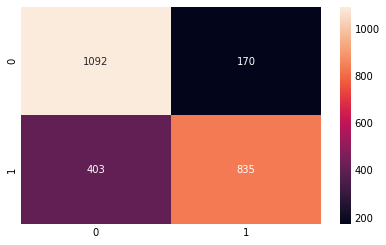

In [7]:
# Testing score
print(rf_model.score(x_test, y_test))

y_test_pred = rf_model.predict(x_test)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='g')
graph.show()

### Gradient Boosting Classifier

In [8]:
gb_model = GradientBoostingClassifier(n_estimators=1000, max_depth=3)
gb_model.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

1.0


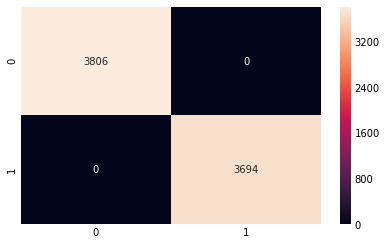

In [9]:
# Training score
print(gb_model.score(x_train, y_train))

y_train_pred = gb_model.predict(x_train)
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='g')
graph.show()

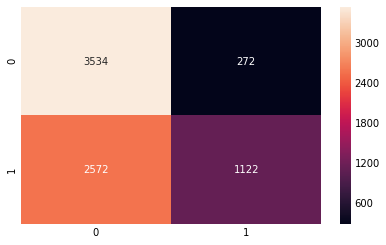

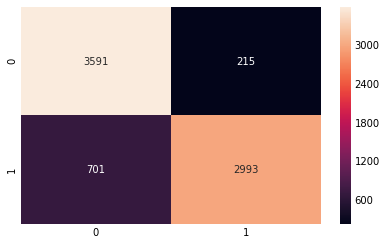

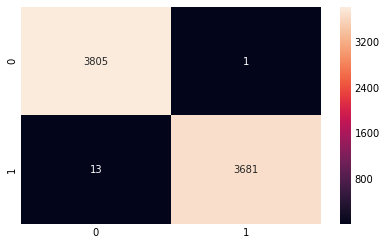

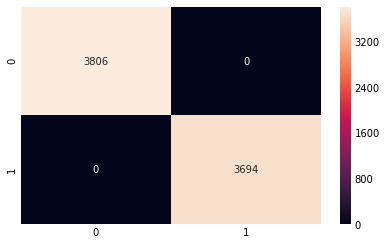

In [10]:
for i, pred in enumerate(gb_model.staged_predict(x_train)):
    if i in [0, 25, 500, 999]:
        sns.heatmap(confusion_matrix(y_train, pred), annot=True, fmt='g')
        graph.show()

0.9508


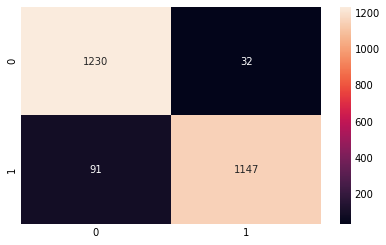

In [11]:
# Testing score
print(gb_model.score(x_test, y_test))

y_test_pred = gb_model.predict(x_test)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='g')
graph.show()